# Visualizing  fordGoBike Data
## by (Amit Kumar Singh)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
from math import radians, sin, cos, acos
no_color = sb.color_palette()[0]

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_cleaned = pd.read_csv('fordgo_master_clean.csv')
df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,member_age,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min,distance_km,distance_miles
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Male,32,December,12,Sun,16,15,1335,0.942931,0.585910
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,Female,54,December,12,Sun,15,13,1313,3.069727,1.907439
2,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,...,Female,22,December,12,Sun,14,2,726,0.636339,0.395403
3,4507,2017-12-31 23:49:28.422,2018-01-01 01:04:35.619,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,...,Female,28,December,12,Sun,23,1,75,0.000000,0.000000
4,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,...,Male,29,December,12,Sun,23,0,36,1.517348,0.942836


In [3]:
df_cleaned.shape

(449234, 24)


## Usage by Month
> October is the most popular month, with July as the second most popular, and June/August coming in closely as the third most popular months to use the bike system. The weather in San Francisco is best in the mid-late summer and usually stays sunny until returning to its usual foggy weather in the late autumn/early winter months.

<Figure size 841.68x595.44 with 0 Axes>

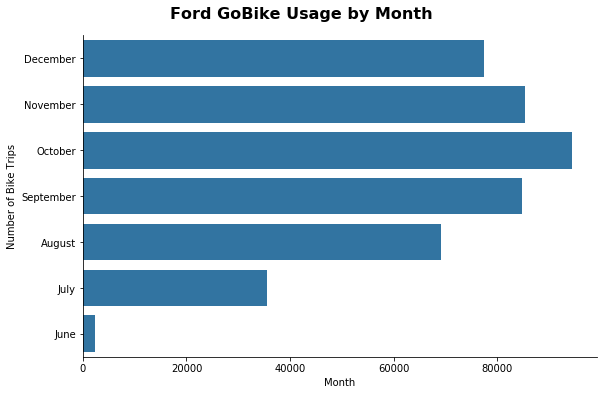

In [4]:
# Monthly usage of the Ford Go Bike system
plt.figure(figsize=[ 11.69, 8.27]);

graph = sb.catplot(data = df_cleaned, y = 'start_time_month', kind = 'count', color = no_color, aspect = 1.7);

graph.set_axis_labels('Month', 'Number of Bike Trips');

graph.fig.suptitle('Ford GoBike Usage by Month', y = 1.05, fontsize = 16, fontweight = 'bold');


## Usage by Hour
>The bikes saw the most usage during the morning hours of 8-9am, and in the afternoon hours of 5-6pm, which is a typical workday in the United States. This furthers the suggestion that the bikes are being used primarily for commuters.

<Figure size 841.68x595.44 with 0 Axes>

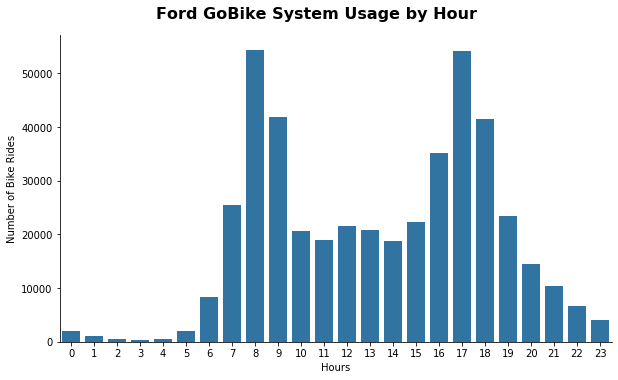

In [5]:
# Hourly usage of the Ford Go Bike System
plt.figure(figsize=[ 11.69, 8.27]);

graph = sb.catplot(data = df_cleaned, x='start_time_hour', kind='count', color = no_color, aspect = 1.7)

graph.set_axis_labels('Hours', 'Number of Bike Rides')

graph.fig.suptitle('Ford GoBike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');


### Trends by User Type
> Customers have a relatively low usage of the bike share system with a small increase on the weekends. Subscribers are the opposite - there is steadily high usage on weekdays, with a sharp decline on the weekend.

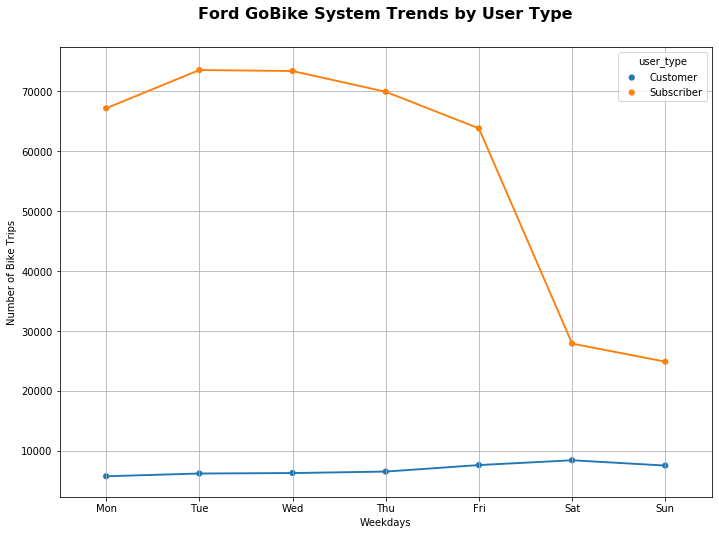

In [6]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=[ 11.69, 8.27]);

df_cleaned_user_week = df_cleaned.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=df_cleaned_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()


### Duration (Min) by User Type
> Customer typically have trip durations are longer (8 to 18 minutes according to the box plot) than for subscribers (5 to 12 minutes according to the box plot). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

<Figure size 841.68x595.44 with 0 Axes>

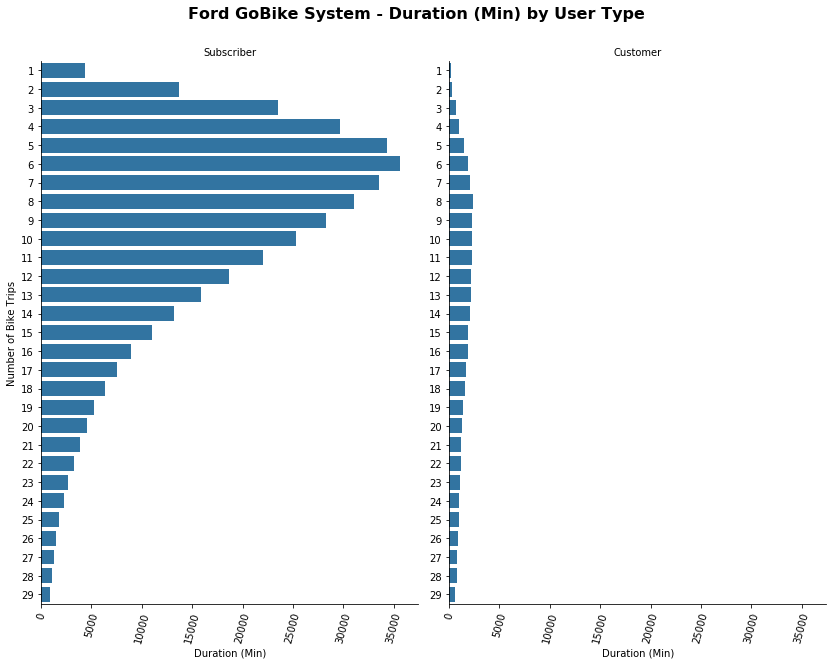

In [7]:

# Customer Usage by Duration vs. Subscriber Usage by Duration
plt.figure(figsize=[ 11.69, 8.27]);

data = df_cleaned.query('duration_min < 30')

graph = sb.catplot(data=data, y = 'duration_min', col='user_type', kind='count', sharey = False, color = no_color, height = 8.27,  aspect = (11.69/2)/8.27);

graph.set_axis_labels('Duration (Min)', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

<Figure size 841.68x595.44 with 0 Axes>

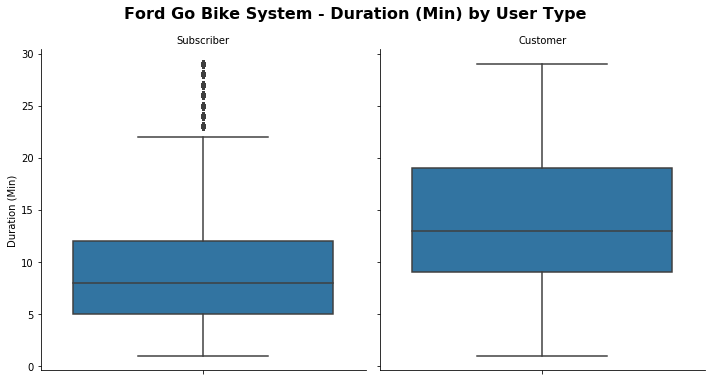

In [8]:
plt.figure(figsize=[11.69, 8.27]);

data = df_cleaned.query('duration_min < 30')

g = sb.catplot(data=data, y='duration_min', col="user_type", kind='box', color = no_color);

g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Ford Go Bike System - Duration (Min) by User Type', y=1.05, fontsize=16, fontweight='bold');

In [10]:
subscriber_age_df = df_cleaned[df_cleaned['user_type'] == 'Subscriber'].groupby(['start_time_month', 'age_bins']).agg({'bike_id':'count'}).reset_index()

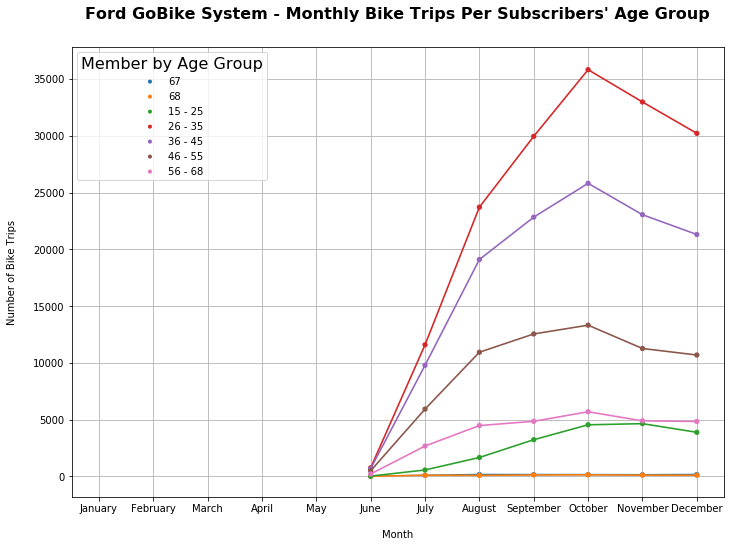

In [11]:

# Comparing monthly number of bike trips per subscribers, based on their age group (reference age bins I calculated above)
plt.figure(figsize=[11.69, 8.27]);

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

ax = sb.pointplot(data = subscriber_age_df, x='start_time_month', y='bike_id', hue='age_bins', scale=.6, order = months);

plt.xlabel('Month', labelpad = 16)
plt.ylabel('Number of Bike Trips', labelpad = 16)
plt.title("Ford GoBike System - Monthly Bike Trips Per Subscribers' Age Group", y = 1.05, fontsize = 16, fontweight = 'bold');

# Legend
leg = ax.legend()
leg.set_title('Member by Age Group', prop={'size': 16})

plt.grid()


### Start Time vs. Weekday
>Customers: During weekdays, most bike rides occur between 4-6pm, peaking on Fridays around 5pm. During weeknds, most bike rides occur between 11am and 6pm, peaking on Saturdays around 2pm. Subscribers: During weekdays, most bike rides occur around 8-9am and 4-6pm. During weekends, there is a significant drop in the number of rented bikes.¶

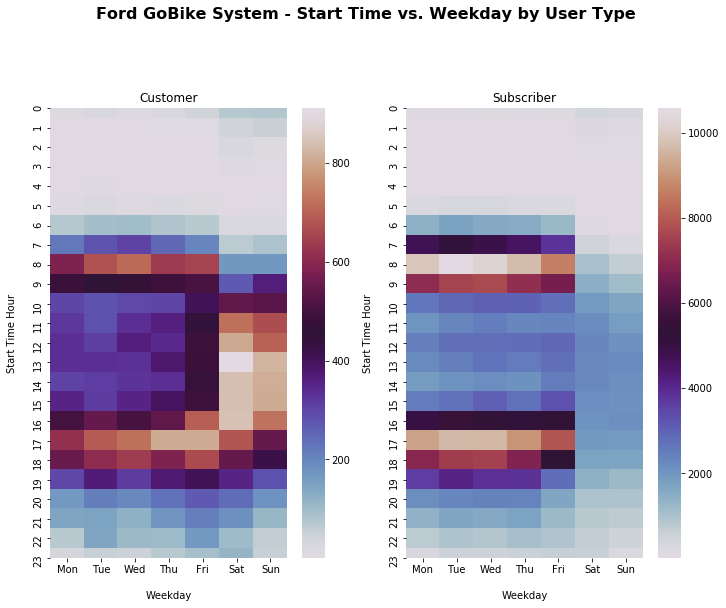

In [12]:
# Weekday order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_cleaned['start_time_weekday'] = pd.Categorical(df_cleaned['start_time_weekday'], categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

plt.figure(figsize=[11.69, 8.27]);

# Heatmap - Customers
plt.subplot(1, 2, 1)
df_customer = df_cleaned.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_customer = df_customer.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
sb.heatmap(df_customer, cmap = 'twilight')

plt.title('Customer', y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour',  labelpad = 16)

# Heatmap - Subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_cleaned.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
sb.heatmap(df_subscriber, cmap = 'twilight')

plt.title("Subscriber", y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);

plt.suptitle('Ford GoBike System - Start Time vs. Weekday by User Type', y = 1.05, fontsize = 16, fontweight = 'bold');

# Summary

>Subscribers are primarily daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm. Age is also a factor within user type. Subscribers who fall in the age group between 26-35 years old are the most common age group to use the bike sharing system. The 26-35 years old also lead the spike which occurs across all age groups in October. Subscribers who fall in the 36-45 year old age group are the next most common age group to use the bike sharing system, and follow a similar trend at the 26-35 year olds.